In [338]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

In [2]:
results_file = 'results.json'

In [3]:
with open(results_file, 'r') as f_handle:
    results = json.load(f_handle)


In [4]:
scopes = list(results.keys())
llms = ['mistralai/mistral-7b-instruct', 'openai/gpt-3.5-turbo']

In [5]:
[[results[scope][llm]['details'] for scope in scopes] for llm in llms]

[[{'bleu_scores': '[0, 0.25, 0.2, 0, 0.2, 0, 0.25, 0.25, 0, 0.2, 0, 0, 0, 0.25, 0.25, 0.25, 0.10000000000000002, 0, 0, 0]',
   'did_pass': [False,
    True,
    True,
    False,
    True,
    False,
    True,
    True,
    False,
    True,
    False,
    False,
    False,
    True,
    True,
    True,
    True,
    False,
    False,
    False],
   'faithfulness_scores': '[0.0, 0.0, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4912188798189163, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]',
   'hallucination_score': '[0.9957514, 0.02822792, 0.04203446, 0.02586521, 0.9882577, 0.8895889, 0.02822792, 0.02822792, 0.10239307, 0.04203446, 0.02822792, 0.02586521, 0.9957514, 0.9957514, 0.02822792, 0.02822792, 0.10239307, 0.04203446, 0.20947951, 0.02822792]',
   'quazi_exact_score': '[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]',
   'questions': [{'answers': ['portside'],
     'context_image_path': '/workspaces/navreas-dataset/questions/spatial_relatio

In [6]:

bleu_scores = [[json.loads(results[scope][llm]['details']['bleu_scores']) for scope in scopes] for llm in llms]
hallucination_scores = [[json.loads(results[scope][llm]['details']['hallucination_score']) for scope in scopes] for llm in llms]
quazi_exact_scores =  [[json.loads(results[scope][llm]['details']['quazi_exact_score']) for scope in scopes] for llm in llms]   
faithfulness_scores = [[json.loads(results[scope][llm]['details']['faithfulness_scores']) for scope in scopes] for llm in llms]   

In [68]:
# Flatten the lists and add each score type to a dictionary
bleu_scores_flat = [score for sublist in bleu_scores for item in sublist for score in item]
print(len(bleu_scores_flat))

hallucination_scores_flat = [score for sublist in hallucination_scores for item in sublist for score in item]
print(len(hallucination_scores_flat))

quazi_exact_scores_flat = [score for sublist in quazi_exact_scores for item in sublist for score in item]
print(quazi_exact_scores_flat)

faithfulness_scores_flat = [1-score for sublist in faithfulness_scores for item in sublist for score in item]
print(len(faithfulness_scores_flat))


40
40
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
40


In [60]:
[llm for llm in llms for _ in range(len(bleu_scores_flat))] 
print(bleu_scores_flat)
print([len(item) for sublist in bleu_scores for item in sublist ])
print(len([llm for llm in llms for _ in range(20)]*3))
print(faithfulness_scores_flat)

[0, 0.25, 0.2, 0, 0.2, 0, 0.25, 0.25, 0, 0.2, 0, 0, 0, 0.25, 0.25, 0.25, 0.10000000000000002, 0, 0, 0, 0, 1.0, 0.25, 0, 1.0, 0, 0, 0, 0.25, 0.25, 0, 0, 0, 1.0, 0, 0, 1.0, 0.25, 0, 0]
[20, 20]
120
[0.0, 0.0, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4912188798189163, 0.9677524119615555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9726773758884519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9726773758884519, 0.9726773758884519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


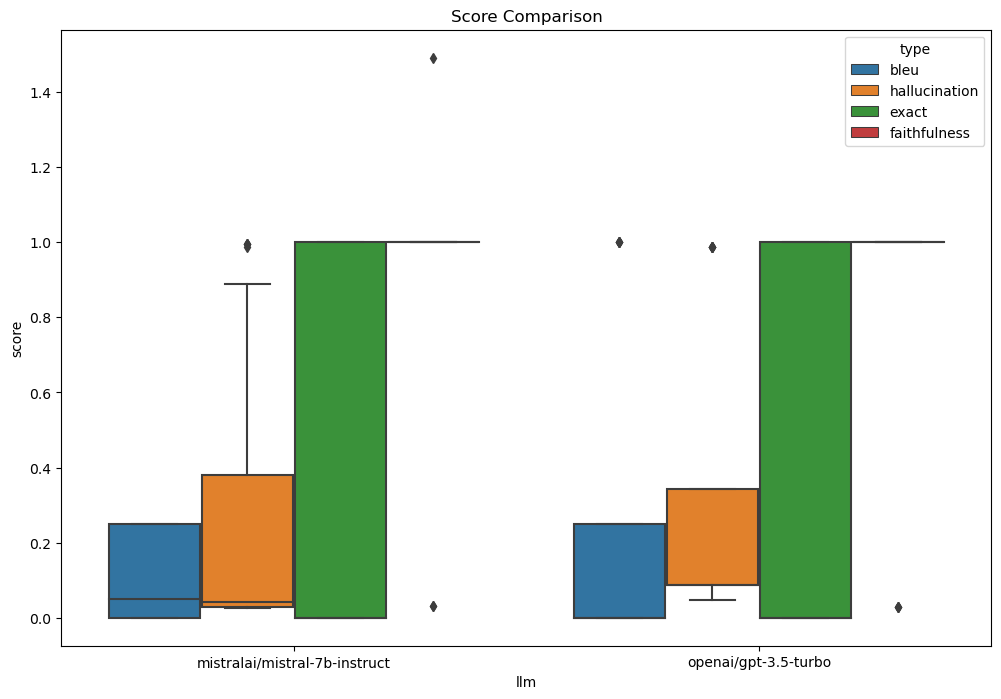

In [69]:
data = {
    "llm": [llm for llm in llms for _ in range(20)]*4, 
    "score": bleu_scores_flat + hallucination_scores_flat + quazi_exact_scores_flat + faithfulness_scores_flat,
    "type": ['bleu']*len(bleu_scores_flat) + ['hallucination']*len(hallucination_scores_flat)  + ['exact']*len(quazi_exact_scores_flat) + ['faithfulness']*len(faithfulness_scores_flat)
}

# Create DataFrame
df = pd.DataFrame(data)
# Then create a grouped boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='llm', y='score', hue='type', data=df)
plt.title('Score Comparison')
plt.show()

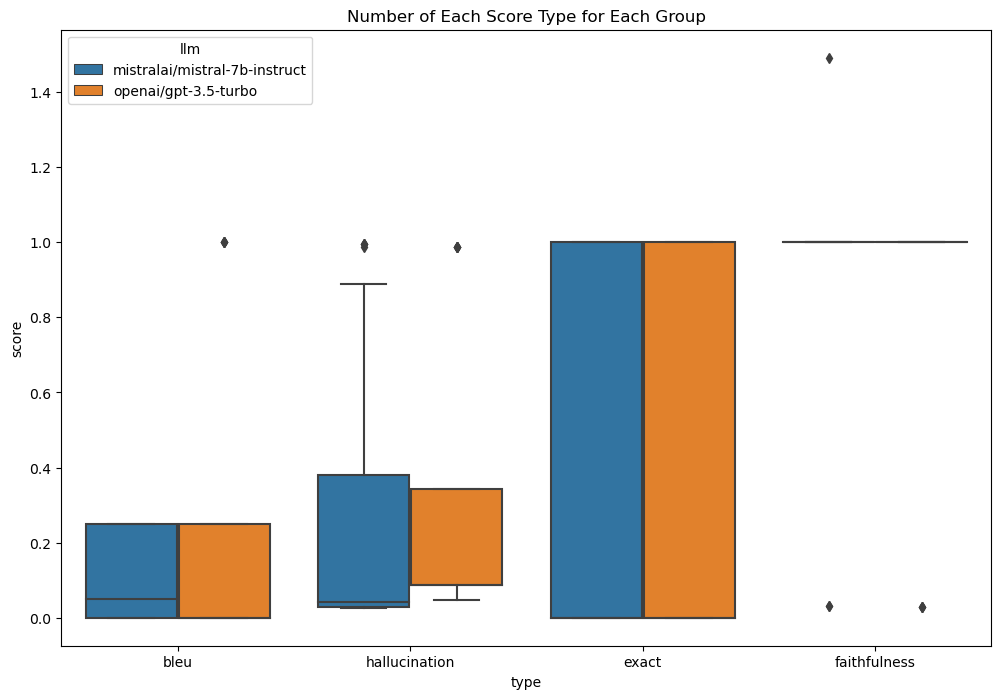

In [70]:
# Group by 'llm' and 'type', and count the scores
grouped_df = df.groupby(['llm', 'type', 'score']).size().reset_index(name='counts')

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='score', hue='llm', data=df)
plt.title('Number of Each Score Type for Each Group')
plt.show()

In [71]:
with open('/Users/oxana/projects/ship-traffic-llm-eval/keys/openai.key') as f:
    OPEN_AI_KEY = f.read()

In [306]:
question = """Marine traffic situation: The own ship, called 'BASTO VI', is a 122.0 meters long Passenger/Ro-Ro Cargo Ship moving at a speed of 10.0 knots on a course of 0.0 degrees. Around the own ship there is 1 target ship. Target 1, 'BASTO VI', a Passenger/Ro-Ro Cargo Ship of 178.0 meters, making 18.0 knots on a course of 133.2\u00b0. Target ship 1 lies 6.7 nautical miles off, bearing 280.0\u00b0 relative. Question: Is the target ship 1 located ahead or astern of the own ship? \n        Please select the appropriate option:\n        (A) ahead\n        (B) astern\n        (C) neither."     
"""
                                
#Correct answer is ahead
get_answer(question)



'(A) ahead'

In [307]:
question = """Marine traffic situation: The own ship, called 'BASTO VI', is a 122.0 meters long Passenger/Ro-Ro Cargo Ship moving at a speed of 10.0 knots on a course of 0.0 degrees. Around the own ship there is 1 target ship. 
Target 1, 'BASTO VI', a Passenger/Ro-Ro Cargo Ship of 178.0 meters, making 18.0 knots on a course of 133.2\u00b0. Target ship 1 lies 6.7 nautical miles off, bearing 280.0\u00b0 relative. Question: Is the target ship 1 approaching or receding the own ship? \n        Please select the appropriate option:\n        (A) approacing or (B) receding.",
"""       
#Correct answer is approaching
get_answer(question)

'(A) approaching'

In [339]:
# correct answer neither
question = """"Marine traffic situation: The own ship, called 'BASTO VI', is a 122.0 meters long Passenger/Ro-Ro Cargo Ship moving at a speed of 10.0 knots on a course of 0.0 degrees. Around the own ship there is 1 target ship.
Target 1, 'Calethea', a Passenger/Ro-Ro Cargo Ship of 178.0 meters, making 18.0 knots on a course of 133.2\u00b0. Target ship 1 lies 6.7 nautical miles off, bearing 280.0\u00b0 relative. Question: Is the target ship 1 
crossing ahead, astern or on the side of the own ship (neigher ahead or astern)? "
"""
get_answer(question)

"Given the information:\n\n- Own ship ('BASTO VI') is heading 0.0° (North).\n- Target ship 1 ('Calethea') has a relative bearing of 280.0° from 'BASTO VI'.\n\nTo determine the position of 'Calethea' relative to 'BASTO VI', we consider the relative bearing. A relative bearing of 280.0°, when measured clockwise from 'BASTO VI's heading of 0.0° (North), suggests that 'Calethea' is located to the northwest of 'BASTO VI'. \n\nHowever, to understand whether 'Calethea' is crossing ahead, astern, or on the side of 'BASTO VI', we need to interpret the relative bearing more precisely:\n\n- A relative bearing of 0° to 180° would indicate that the target is ahead (with 0° directly ahead and 180° directly astern).\n- A relative bearing of 180° to 360° would indicate that the target is astern (with 180° directly astern and 360°/0° directly ahead).\n\nGiven that 'Calethea' has a relative bearing of 280.0°, this places it in the quadrant astern of 'BASTO VI' but towards the port side (since 270° would